<a href="https://colab.research.google.com/github/cyprus09/ie4483-cats-dogs/blob/dev/Exploratory_Analysis_IE4483.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

In [ ]:
from zipfile import ZipFile
file_name = '/content/val_exploratory.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name = '/content/test.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# Load the checkpoint
checkpoint_alexnet = torch.load('/content/drive/MyDrive/ie4483_weights/model_alexnet_pretrained.pth', map_location ='cpu')

# Inspect keys
print(checkpoint_alexnet.keys())

<ipython-input-4-ccaa09e94c52>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_alexnet = torch.load('/content/drive/MyDrive/ie4483_weights/model_alexnet_pretrain

dict_keys(['model_state_dict', 'classes'])


In [ ]:
# Load the checkpoint
checkpoint_vgg = torch.load('/content/drive/MyDrive/ie4483_weights/model_vgg_pretrained.pth', map_location ='cpu')

# Inspect keys
print(checkpoint_vgg.keys())

<ipython-input-5-04f145a877ad>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_vgg = torch.load('/content/drive/MyDrive/ie4483_weights/model_vgg_pretrained.pth',

dict_keys(['model_state_dict', 'classes'])


In [ ]:
# Load the pretrained AlexNet model
model = models.alexnet(pretrained=True)

# Modify the final classifier layer for binary classification
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 154MB/s]


In [ ]:
# Load the pretrained VGG16 model
model = models.vgg16(pretrained=True)

# Modify the final classifier layer for binary classification
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 104MB/s] 


In [ ]:
from collections import OrderedDict
# Remove "module." prefix
state_dict_alexnet = checkpoint_alexnet['model_state_dict']
new_state_dict_alexnet = OrderedDict()
for k, v in state_dict_alexnet.items():
    new_key = k.replace("module.", "")
    new_state_dict_alexnet[new_key] = v

In [ ]:
from collections import OrderedDict
# Remove "module." prefix
state_dict_vgg = checkpoint_vgg['model_state_dict']
new_state_dict_vgg = OrderedDict()
for k, v in state_dict_vgg.items():
    new_key = k.replace("module.", "")
    new_state_dict_vgg[new_key] = v

In [ ]:
new_state_dict_alexnet = {}
# Remove "alexnet." prefix
for key, value in checkpoint_alexnet.items():
    if key.startswith("alexnet."):
        new_key = key[len("alexnet."):]
    else:
        new_key = key
    new_state_dict_alexnet[new_key] = value

In [ ]:
new_state_dict_vgg16 = {}
# Remove "alexnet." prefix
for key, value in checkpoint_vgg.items():
    if key.startswith("vgg16."):
        new_key = key[len("vgg16."):]
    else:
        new_key = key
    new_state_dict_vgg16[new_key] = value

In [ ]:
# Initialize AlexNet model and load state dict
model.load_state_dict(new_state_dict_alexnet, strict=False)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Initialize VGG model and load state dict
model.load_state_dict(new_state_dict_vgg16, strict=False)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Alexnet transformations
transform_alexnet = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# VGG16 transformations
transform_vgg16 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Load the validation dataset for alexnet
val_data_alexnet = ImageFolder(root='/content/val_exploratory', transform=transform_alexnet)
val_loader_alexnet = DataLoader(val_data_alexnet, batch_size=16, shuffle=True)

In [ ]:
# Load the validation dataset for alexnet
val_data_vgg16 = ImageFolder(root='/content/val_exploratory', transform=transform_vgg16)
val_loader_vgg16 = DataLoader(val_data_vgg16, batch_size=16, shuffle=True)

In [ ]:
# Track correctly classified images for alexnet
classified_alexnet = []

# Run the model on the test set
with torch.no_grad():
    for images, labels in val_loader_alexnet:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Iterate over each prediction and label in the batch
        for i in range(len(predicted)):
            # Check if the prediction is incorrect for this image
            if predicted[i].item() == labels[i].item():
                classified_alexnet.append((images[i], predicted[i].item(), labels[i].item()))

In [ ]:
# Track misclassified images for alexnet
misclassified_alexnet = []

# Run the model on the test set
with torch.no_grad():
    for images, labels in val_loader_alexnet:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Iterate over each prediction and label in the batch
        for i in range(len(predicted)):
            # Check if the prediction is incorrect for this image
            if predicted[i].item() != labels[i].item():
                misclassified_alexnet.append((images[i], predicted[i].item(), labels[i].item()))

In [ ]:
# Track correctly classified images for vgg16
classified_vgg16 = []

# Run the model on the test set
with torch.no_grad():
    for images, labels in val_loader_vgg16:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Iterate over each prediction and label in the batch
        for i in range(len(predicted)):
            # Check if the prediction is incorrect for this image
            if predicted[i].item() == labels[i].item():
                classified_vgg16.append((images[i], predicted[i].item(), labels[i].item()))

In [ ]:
# Track misclassified images for vgg16
misclassified_vgg16 = []

# Run the model on the test set
with torch.no_grad():
    for images, labels in val_loader_vgg16:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Iterate over each prediction and label in the batch
        for i in range(len(predicted)):
            # Check if the prediction is incorrect for this image
            if predicted[i].item() != labels[i].item():
                misclassified_vgg16.append((images[i], predicted[i].item(), labels[i].item()))

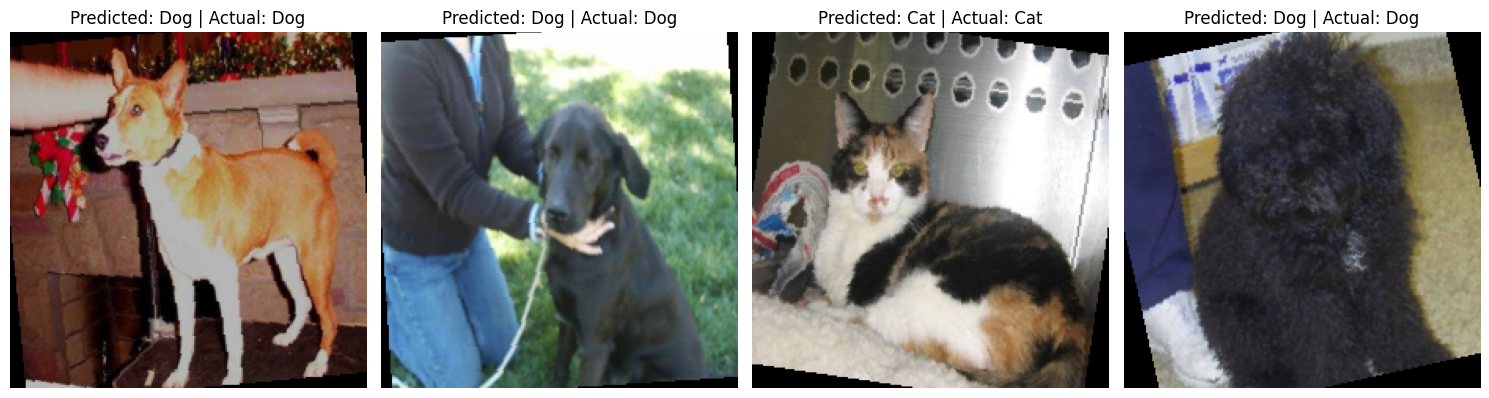

In [ ]:
# Define label mapping
label_map = {0: "Cat", 1: "Dog"}

# Set number of columns and rows
num_samples = 4
num_cols = num_samples
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i in range(num_samples):
    image, pred_label, true_label = random.choice(classified_alexnet)
    image = image.cpu().numpy().transpose((1, 2, 0))
    image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    image = image.clip(0, 1)

    # Plot each image in the row
    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {label_map[pred_label]} | Actual: {label_map[true_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

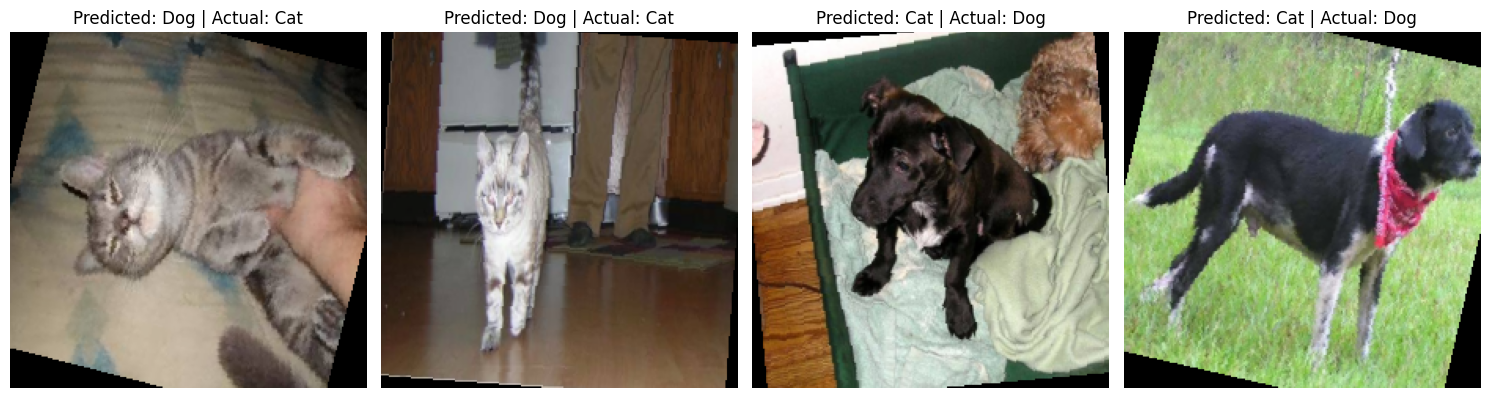

In [ ]:
# Define label mapping
label_map = {0: "Cat", 1: "Dog"}

# Set number of columns and rows
num_samples = 4
num_cols = num_samples
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i in range(num_samples):
    image, pred_label, true_label = random.choice(misclassified_alexnet)
    image = image.cpu().numpy().transpose((1, 2, 0))
    image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    image = image.clip(0, 1)

    # Plot each image in the row
    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {label_map[pred_label]} | Actual: {label_map[true_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

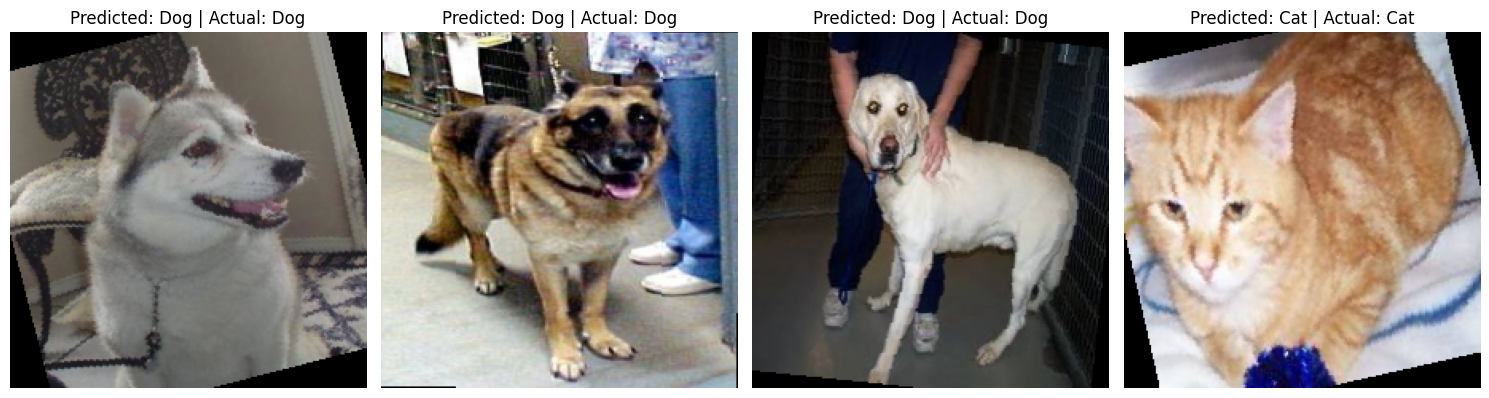

In [ ]:
# Define label mapping
label_map = {0: "Cat", 1: "Dog"}

# Set number of columns and rows
num_samples = 4
num_cols = num_samples
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i in range(num_samples):
    image, pred_label, true_label = random.choice(classified_vgg16)
    image = image.cpu().numpy().transpose((1, 2, 0))
    image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    image = image.clip(0, 1)

    # Plot each image in the row
    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {label_map[pred_label]} | Actual: {label_map[true_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

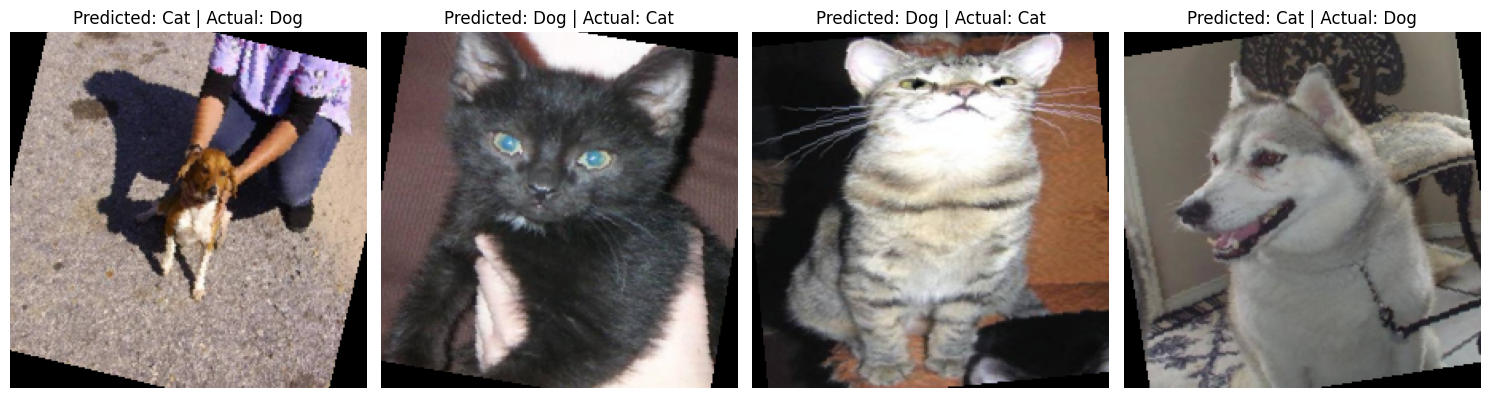

In [ ]:
# Define label mapping
label_map = {0: "Cat", 1: "Dog"}

# Set number of columns and rows
num_samples = 4
num_cols = num_samples
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i in range(num_samples):
    image, pred_label, true_label = random.choice(misclassified_vgg16)
    image = image.cpu().numpy().transpose((1, 2, 0))
    image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    image = image.clip(0, 1)

    # Plot each image in the row
    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {label_map[pred_label]} | Actual: {label_map[true_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
class UnlabeledImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, img_name

In [ ]:
# Load the test dataset
test_dataset = UnlabeledImageDataset(image_dir='/content/test', transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# Dictionary to store feature maps for alexnet
feature_maps = {}

def get_feature_maps(layer_name):
    def hook(model, input, output):
        feature_maps[layer_name] = output.detach()
    return hook

# Register hooks to layers
model.features[0].register_forward_hook(get_feature_maps('conv1'))
model.features[3].register_forward_hook(get_feature_maps('conv2'))
model.features[6].register_forward_hook(get_feature_maps('conv3'))
model.features[8].register_forward_hook(get_feature_maps('conv4'))
model.features[10].register_forward_hook(get_feature_maps('conv5'))

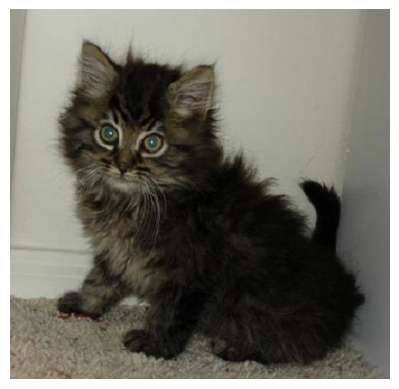

Layer conv1: torch.Size([1, 64, 109, 112])


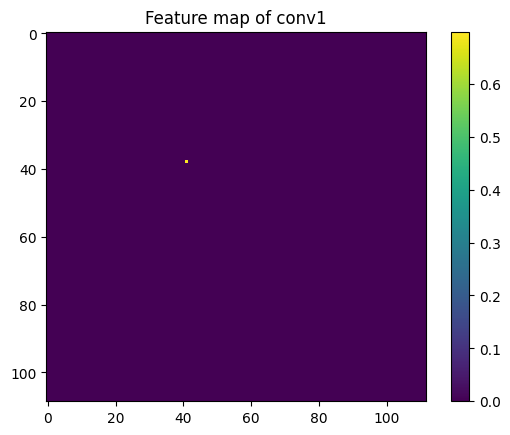

Layer conv2: torch.Size([1, 192, 54, 55])


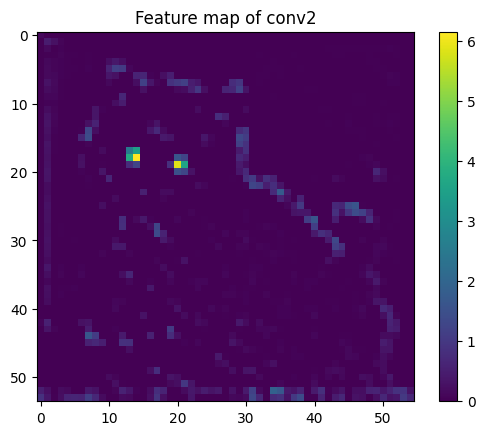

Layer conv3: torch.Size([1, 384, 26, 27])


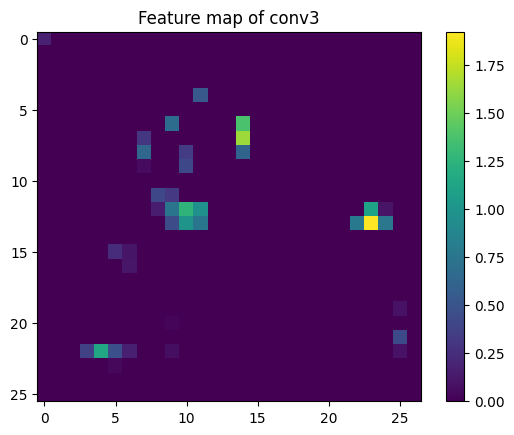

Layer conv4: torch.Size([1, 256, 26, 27])


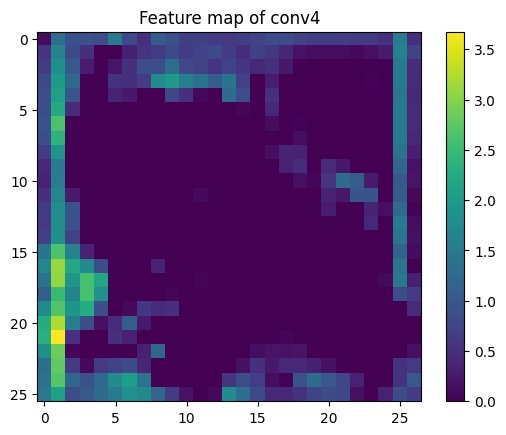

Layer conv5: torch.Size([1, 256, 26, 27])


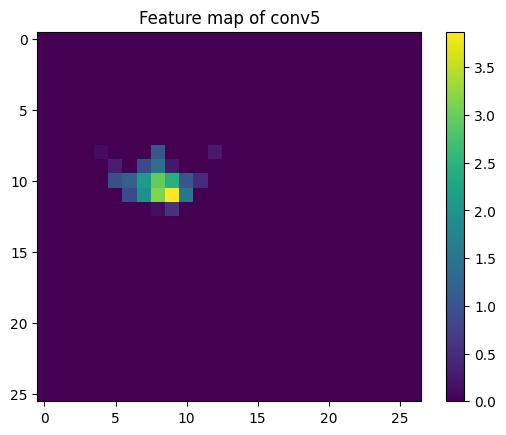

In [ ]:
# Fetch a single random image from the test_loader
for images, _ in test_loader:
    # Select a random image index from the batch
    random_idx = random.randint(0, images.size(0) - 1)
    random_image = images[random_idx].unsqueeze(0)  # Add batch dimension
    plt.imshow(random_image.squeeze().permute(1, 2, 0))
    plt.axis('off')
    plt.show()

    # Forward pass
    _ = model(random_image)

    # Visualize or save feature maps for each layer
    for layer_name, fmap in feature_maps.items():
        print(f"Layer {layer_name}: {fmap.shape}")

        # Visualize the first filter's feature map for the random image
        fmap_img = fmap[0, 0, :, :].cpu().numpy()  # Extract first filter map
        plt.imshow(fmap_img, cmap='viridis')
        plt.title(f'Feature map of {layer_name}')
        plt.colorbar()
        plt.show()

    # Stop after processing the first batch
    break

In [ ]:
# Dictionary to store feature maps for vgg16
feature_maps = {}

def get_feature_maps(layer_name):
    def hook(model, input, output):
        feature_maps[layer_name] = output.detach()
    return hook

# Register hooks to layers
model.features[0].register_forward_hook(get_feature_maps('conv1'))
model.features[2].register_forward_hook(get_feature_maps('conv2'))
model.features[5].register_forward_hook(get_feature_maps('conv3'))
model.features[7].register_forward_hook(get_feature_maps('conv4'))
model.features[10].register_forward_hook(get_feature_maps('conv5'))
model.features[12].register_forward_hook(get_feature_maps('conv6'))
model.features[14].register_forward_hook(get_feature_maps('conv7'))
model.features[17].register_forward_hook(get_feature_maps('conv8'))
model.features[19].register_forward_hook(get_feature_maps('conv9'))
model.features[21].register_forward_hook(get_feature_maps('conv10'))
model.features[24].register_forward_hook(get_feature_maps('conv11'))
model.features[26].register_forward_hook(get_feature_maps('conv12'))
model.features[28].register_forward_hook(get_feature_maps('conv13'))

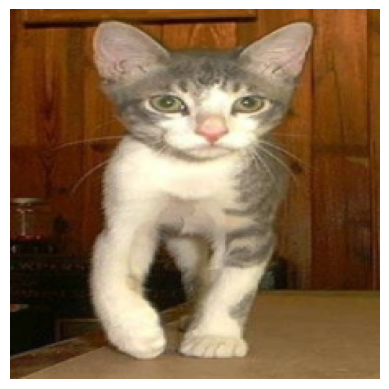

Layer conv1: torch.Size([1, 64, 227, 227])


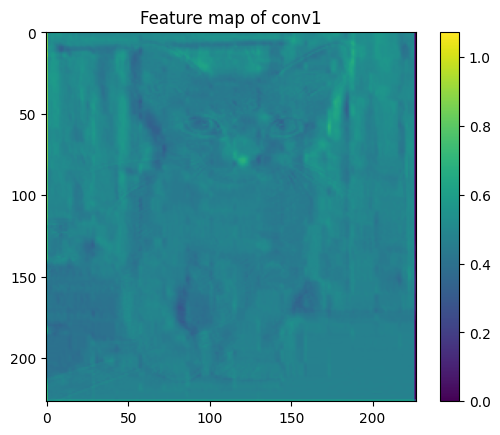

Layer conv2: torch.Size([1, 64, 227, 227])


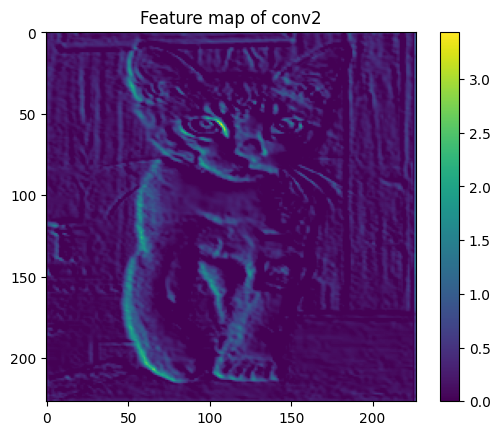

Layer conv3: torch.Size([1, 128, 113, 113])


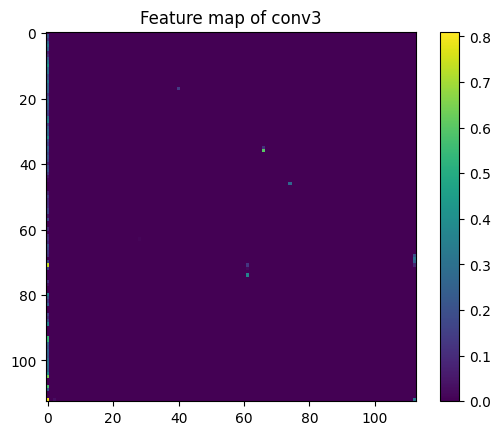

Layer conv4: torch.Size([1, 128, 113, 113])


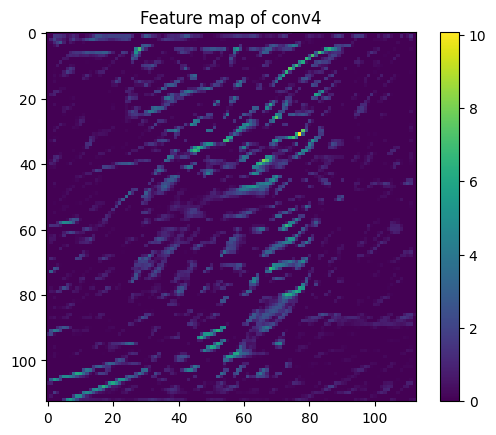

Layer conv5: torch.Size([1, 256, 56, 56])


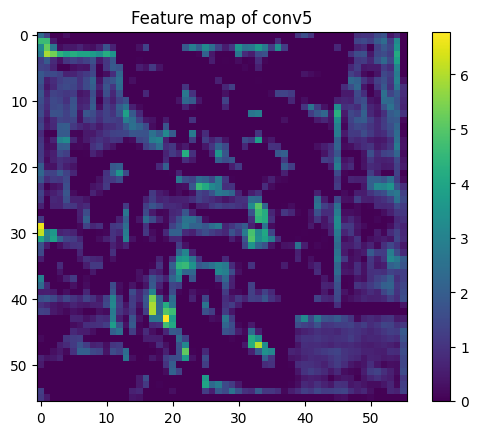

Layer conv6: torch.Size([1, 256, 56, 56])


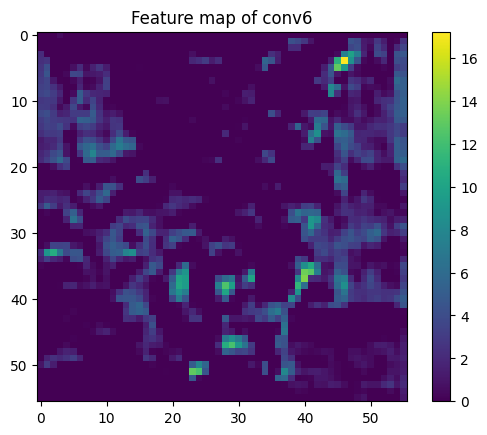

Layer conv7: torch.Size([1, 256, 56, 56])


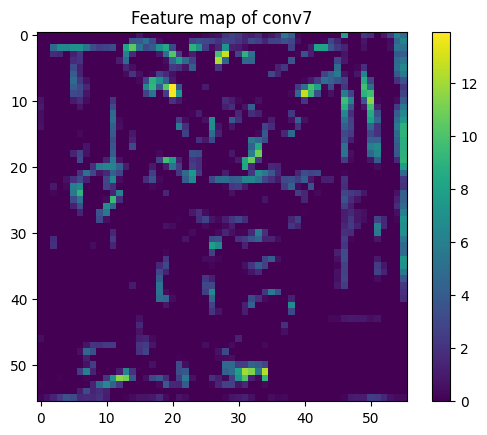

Layer conv8: torch.Size([1, 512, 28, 28])


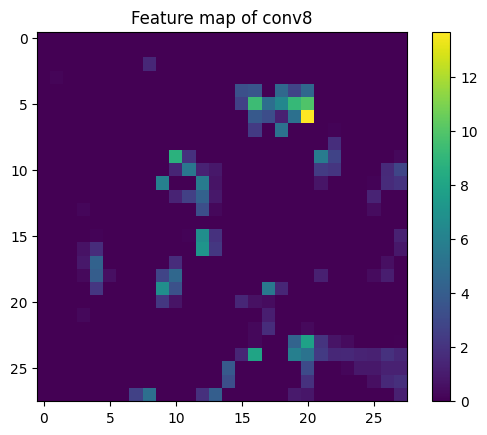

Layer conv9: torch.Size([1, 512, 28, 28])


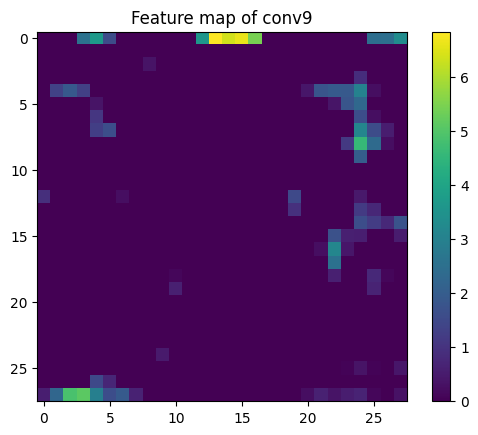

Layer conv10: torch.Size([1, 512, 28, 28])


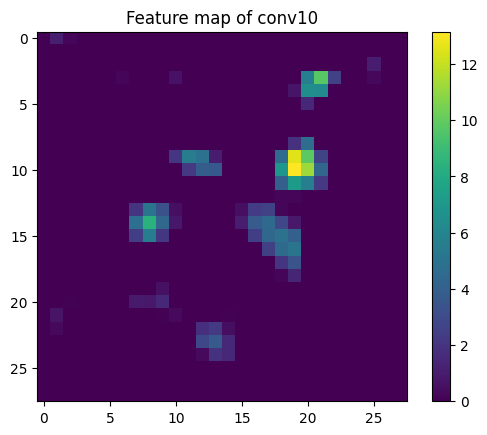

Layer conv11: torch.Size([1, 512, 14, 14])


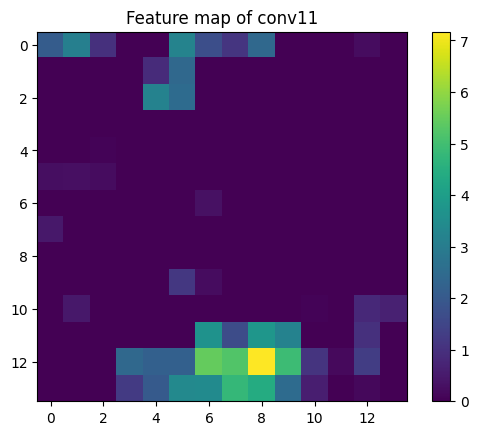

Layer conv12: torch.Size([1, 512, 14, 14])


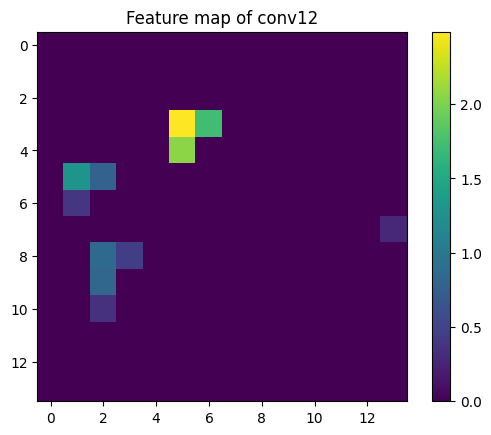

Layer conv13: torch.Size([1, 512, 14, 14])


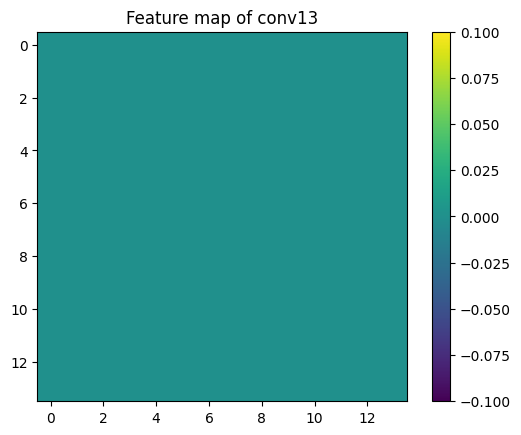

In [ ]:
# Fetch a random batch from the test_loader
for images, _ in test_loader:
    # Select a random image index from the batch
    random_idx = random.randint(0, images.size(0) - 1)  # Get a valid index in the batch
    random_image = images[random_idx].unsqueeze(0)  # Add batch dimension for model

    # Display the random image
    plt.imshow(random_image.squeeze().permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()

    # Forward pass to generate feature maps
    _ = model(random_image)

    # Visualize or save feature maps for each layer
    for layer_name, fmap in feature_maps.items():
        print(f"Layer {layer_name}: {fmap.shape}")

        # Display the first filter's feature map for the random image
        fmap_img = fmap[0, 0, :, :].cpu().numpy()  # Extract the first filter's map
        plt.imshow(fmap_img, cmap='viridis')
        plt.title(f'Feature map of {layer_name}')
        plt.colorbar()
        plt.show()

    # Stop after processing the first batch to avoid looping through the loader
    break
